## Final Project--- SCM 516

**Section I** 

**Classification dataset:**
* Heart Failure Clinical Records
* https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records


In [3]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [4]:
# read file
df_old=pd.read_csv(r"/Users/luns/Desktop/ASU/SCM516/TA/heart_failure_clinical_records_dataset.csv")

In [5]:
# remove space
df_old.columns = df_old.columns.str.strip()
print(df_old.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [6]:
# check imported data
df_old.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


**Remove Outlier**

In [9]:
import pandas as pd

# Remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1 
        
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
       
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df


numeric_columns = df_old.select_dtypes(include=['float64', 'int64']).columns

# Apply outlier removal
df_cleaned = remove_outliers_iqr(df_old, numeric_columns)

# Cleaned DataFrame (without outliers)
print("Cleaned DataFrame (without outliers):")
print(df_cleaned)

Cleaned DataFrame (without outliers):
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
5    90.0        1                        47         0                 40   
6    75.0        1                       246         0                 15   
..    ...      ...                       ...       ...                ...   
291  60.0        0                       320         0                 35   
292  52.0        0                       190         1                 38   
293  63.0        1                       103         1                 35   
294  62.0        0                        61         1                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  

**Balance the data**

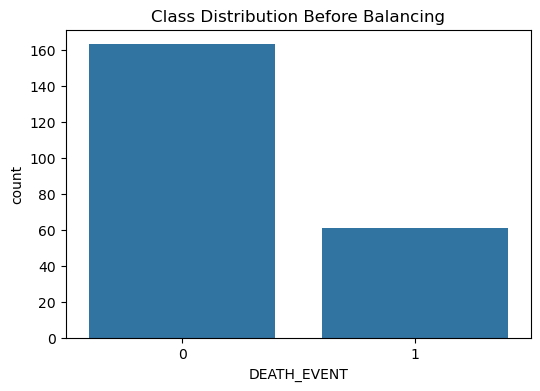

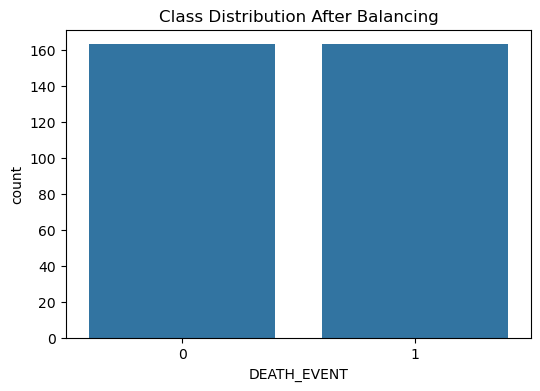

Balanced DataFrame (after SMOTE):
           age  anaemia  creatinine_phosphokinase  diabetes  \
0    75.000000        0                       582         0   
1    65.000000        0                       146         0   
2    50.000000        1                       111         0   
3    90.000000        1                        47         0   
4    75.000000        1                       246         0   
..         ...      ...                       ...       ...   
321  67.133354        1                       193         0   
322  56.455712        1                       186         0   
323  67.635411        0                       659         1   
324  74.218038        0                       567         0   
325  61.609918        0                       264         0   

     ejection_fraction  high_blood_pressure      platelets  serum_creatinine  \
0                   20                    1  265000.000000          1.900000   
1                   20                    0  1620

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Step 1: Visualize the class distribution before balancing
plt.figure(figsize=(6,4))
sns.countplot(x='DEATH_EVENT', data=df_cleaned)
plt.title('Class Distribution Before Balancing')
plt.show()

# Step 2: Define features (X) and target (y)
X = df_cleaned.drop(columns=['DEATH_EVENT'])  # Features
y = df_cleaned['DEATH_EVENT']  # Target

# Step 3: Apply SMOTE to balance the data
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

# Combine the resampled features and target into a balanced DataFrame
df = pd.concat([X_res, y_res.rename('DEATH_EVENT')], axis=1)

# Step 4: Visualize the class distribution after balancing
plt.figure(figsize=(6,4))
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Class Distribution After Balancing')
plt.show()

# Display the final balanced DataFrame
print("Balanced DataFrame (after SMOTE):")
print(df)


### 1. Conditional Probability

**1-1 Single feature conditional probabilities:**

In [14]:
# count total patients
total_patients = len(df)
total_patients

326

1. P (DEATH_EVENT = yes | age > 60)

In [16]:
death_over60_patients = df[(df['age'] > 60) & (df['DEATH_EVENT'] == 1 )].shape[0]

over60_patients = df[(df['age'] > 60) ].shape[0]

probability = (death_over60_patients/ over60_patients)* 100
print(f"P (DEATH_EVENT = yes | age > 60): {probability:.2f} %")

P (DEATH_EVENT = yes | age > 60): 61.96 %


2. P (DEATH_EVENT = yes | sex = male)

In [18]:
# 0 = Female
# 1 = Male

death_male_patients = df[(df['sex'] == 1) & (df['DEATH_EVENT'] == 1 )].shape[0]

male_patients = df[(df['sex'] == 1) ].shape[0]

probability = (death_male_patients/ male_patients)* 100
print(f"P (DEATH_EVENT = yes | sex = male): {probability:.2f} %")

P (DEATH_EVENT = yes | sex = male): 45.50 %


3. P (DEATH_EVENT = yes | smoking = yes)

In [20]:
death_smoking_patients = df[(df['smoking'] == 1) & (df['DEATH_EVENT'] == 1 )].shape[0]

smoking_patients = df[(df['smoking'] == 1) ].shape[0]

probability = (death_smoking_patients/ smoking_patients)* 100
print(f"P (DEATH_EVENT = yes | smoking = yes): {probability:.2f} %")

P (DEATH_EVENT = yes | smoking = yes): 39.76 %


4. P(DEATH_EVENT=yes∣creatinine_phosphokinase>200)

In [22]:
death_cp_patients = df[(df['creatinine_phosphokinase'] > 200) & (df['DEATH_EVENT'] == 1 )].shape[0]

cp_patients = df[(df['creatinine_phosphokinase'] > 200) ].shape[0]

probability = (death_cp_patients/ cp_patients)* 100
print(f"P(DEATH_EVENT=yes∣creatinine_phosphokinase>200): {probability:.2f} %")

P(DEATH_EVENT=yes∣creatinine_phosphokinase>200): 53.11 %


5. P (DEATH_EVENT = yes | diabetes = yes)

In [24]:
death_diabetes_patients = df[(df['diabetes'] == 1) & (df['DEATH_EVENT'] == 1 )].shape[0]

diabetes_patients = df[(df['diabetes'] == 1) ].shape[0]

probability = (death_male_patients/ male_patients)* 100
print(f"P (DEATH_EVENT = yes | diabetes = yes): {probability:.2f} %")

P (DEATH_EVENT = yes | diabetes = yes): 45.50 %


6. P(DEATH_EVENT=yes∣high_blood_pressure=yes)

In [26]:
death_hiblood_patients = df[(df['high_blood_pressure'] == 1) & (df['DEATH_EVENT'] == 1 )].shape[0]

hiblood_patients = df[(df['high_blood_pressure'] == 1) ].shape[0]

probability = (death_hiblood_patients/ hiblood_patients)* 100
print(f"P(DEATH_EVENT=yes∣high_blood_pressure=yes): {probability:.2f} %")

P(DEATH_EVENT=yes∣high_blood_pressure=yes): 47.27 %


**1-2 Two Feature Conditional Probabilities:**

1. P(DEATH_EVENT=yes∣age>60,sex=male)

In [29]:
# male with age>60
age = df['age'] > 60
male_60 = df[(df['sex'] == 1) &(age)]

# male with age>60 has died due to heart failure?
male_60_death = male_60[male_60['DEATH_EVENT'] == 1 ].shape[0]

total_male_60 = male_60.shape[0]

probability = (male_60_death / total_male_60) * 100
print(f"P(DEATH_EVENT=yes | age>60, sex=male): {probability:.2f} %")


P(DEATH_EVENT=yes | age>60, sex=male): 58.59 %


2. P(DEATH_EVENT=yes∣age>60,smoking=yes)

In [31]:
# male with age>60
age = df['age'] > 60
smoking_60 = df[(df['smoking'] == 1) &(age)]

# male with age>60 has died due to heart failure?
smoking_60_death = smoking_60[smoking_60['DEATH_EVENT'] == 1 ].shape[0]

total_smoking_60 = smoking_60.shape[0]

probability = (smoking_60_death / total_smoking_60) * 100
print(f"P(DEATH_EVENT=yes | age>60, smoking=yes): {probability:.2f} %")

P(DEATH_EVENT=yes | age>60, smoking=yes): 55.81 %


3. P(DEATH_EVENT=yes∣creatinine_phosphokinase>200,age > 60)

In [33]:
# male with age>60
age = df['age'] > 60
cp_60 = df[(df['creatinine_phosphokinase'] > 200) &(age)]

# male with age>60 has died due to heart failure?
cp_60_death = cp_60[cp_60['DEATH_EVENT'] == 1 ].shape[0]

total_cp_60 = cp_60.shape[0]

probability = (cp_60_death / total_cp_60) * 100
print(f"P(DEATH_EVENT=yes∣creatinine_phosphokinase>200,age > 60): {probability:.2f} %")

P(DEATH_EVENT=yes∣creatinine_phosphokinase>200,age > 60): 64.36 %


4. P(DEATH_EVENT=yes∣creatinine_phosphokinase>200,sex=male)

In [35]:
# male with age>60
male = df['sex'] == 1
male_60 = df[(df['creatinine_phosphokinase'] > 200) &(male)]

# male with age>60 has died due to heart failure?
male_60_death = male_60[male_60['DEATH_EVENT'] == 1 ].shape[0]

total_male_60 = male_60.shape[0]

probability = (male_60_death / total_male_60) * 100
print(f"P(DEATH_EVENT=yes∣creatinine_phosphokinase>200,sex=male): {probability:.2f} %")

P(DEATH_EVENT=yes∣creatinine_phosphokinase>200,sex=male): 51.02 %


### 2. Feature/factor Importance


**- Feature importance using Naïve Bayes**

**Feature: Smoking**

In [39]:
death_smoking_yes = df[(df['smoking'] == 1) & (df['DEATH_EVENT'] == 1)].shape[0]
total_smoking_yes = df[df['smoking'] == 1].shape[0]
P_death_given_smoking_yes = death_smoking_yes / total_smoking_yes if total_smoking_yes > 0 else 0

death_smoking_no = df[(df['smoking'] == 0) & (df['DEATH_EVENT'] == 1)].shape[0]
total_smoking_no = df[df['smoking'] == 0].shape[0]
P_death_given_smoking_no = death_smoking_no / total_smoking_no if total_smoking_no > 0 else 0

difference_smoking = P_death_given_smoking_yes - P_death_given_smoking_no

print(f"P(DEATH_EVENT = yes | smoking = yes): {P_death_given_smoking_yes:.2f}")
print(f"P(DEATH_EVENT = yes | smoking = no): {P_death_given_smoking_no:.2f}")
print(f"Difference in probabilities: {difference_smoking:.2f}")


P(DEATH_EVENT = yes | smoking = yes): 0.40
P(DEATH_EVENT = yes | smoking = no): 0.53
Difference in probabilities: -0.14


**Feature: High Blood Pressure**

In [41]:
# P(DEATH_EVENT = yes | high_blood_pressure = yes)
death_hbp_yes = df[(df['high_blood_pressure'] == 1) & (df['DEATH_EVENT'] == 1)].shape[0]
total_hbp_yes = df[df['high_blood_pressure'] == 1].shape[0]
P_death_given_hbp_yes = death_hbp_yes / total_hbp_yes if total_hbp_yes > 0 else 0

# P(DEATH_EVENT = yes | high_blood_pressure = no)
death_hbp_no = df[(df['high_blood_pressure'] == 0) & (df['DEATH_EVENT'] == 1)].shape[0]
total_hbp_no = df[df['high_blood_pressure'] == 0].shape[0]
P_death_given_hbp_no = death_hbp_no / total_hbp_no if total_hbp_no > 0 else 0

difference_hbp = P_death_given_hbp_yes - P_death_given_hbp_no

print(f"High Blood Pressure Feature Importance:")
print(f"P(DEATH_EVENT = yes | high_blood_pressure = yes): {P_death_given_hbp_yes:.2f}")
print(f"P(DEATH_EVENT = yes | high_blood_pressure = no): {P_death_given_hbp_no:.2f}")
print(f"Difference in probabilities: {difference_hbp:.2f}")


High Blood Pressure Feature Importance:
P(DEATH_EVENT = yes | high_blood_pressure = yes): 0.47
P(DEATH_EVENT = yes | high_blood_pressure = no): 0.51
Difference in probabilities: -0.04


**Feature: Age**

In [43]:
df['age_binary'] = df['age'] > 60

# P(DEATH_EVENT = yes | age > 60)
death_age_yes = df[(df['age_binary'] == True) & (df['DEATH_EVENT'] == 1)].shape[0]
total_age_yes = df[df['age_binary'] == True].shape[0]
P_death_given_age_yes = death_age_yes / total_age_yes if total_age_yes > 0 else 0

# P(DEATH_EVENT = yes | age <= 60)
death_age_no = df[(df['age_binary'] == False) & (df['DEATH_EVENT'] == 1)].shape[0]
total_age_no = df[df['age_binary'] == False].shape[0]
P_death_given_age_no = death_age_no / total_age_no if total_age_no > 0 else 0

difference_age = P_death_given_age_yes - P_death_given_age_no

print(f"Age Feature Importance:")
print(f"P(DEATH_EVENT = yes | age > 60): {P_death_given_age_yes:.2f}")
print(f"P(DEATH_EVENT = yes | age <= 60): {P_death_given_age_no:.2f}")
print(f"Difference in probabilities: {difference_age:.2f}")


Age Feature Importance:
P(DEATH_EVENT = yes | age > 60): 0.62
P(DEATH_EVENT = yes | age <= 60): 0.35
Difference in probabilities: 0.27


**Feature: Sex**

In [45]:
# P(DEATH_EVENT = yes | sex = male)
death_male = df[(df['sex'] == 1) & (df['DEATH_EVENT'] == 1)].shape[0]
total_male = df[df['sex'] == 1].shape[0]
P_death_given_male = death_male / total_male if total_male > 0 else 0

# P(DEATH_EVENT = yes | sex = female)
death_female = df[(df['sex'] == 0) & (df['DEATH_EVENT'] == 1)].shape[0]
total_female = df[df['sex'] == 0].shape[0]
P_death_given_female = death_female / total_female if total_female > 0 else 0

difference_sex = P_death_given_male - P_death_given_female

print(f"Sex Feature Importance:")
print(f"P(DEATH_EVENT = yes | sex = male): {P_death_given_male:.2f}")
print(f"P(DEATH_EVENT = yes | sex = female): {P_death_given_female:.2f}")
print(f"Difference in probabilities: {difference_sex:.2f}")


Sex Feature Importance:
P(DEATH_EVENT = yes | sex = male): 0.46
P(DEATH_EVENT = yes | sex = female): 0.56
Difference in probabilities: -0.11


**- Feature importance using Random Forest**

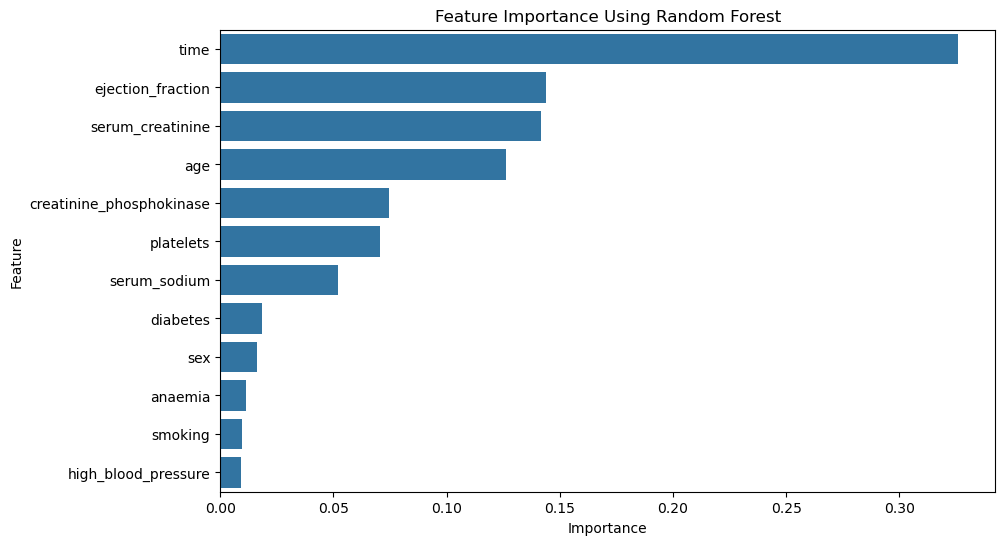

In [47]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
        'ejection_fraction', 'high_blood_pressure', 'platelets',
        'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

y = df['DEATH_EVENT'] 

# create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

rf_model.fit(X, y)



feature_importances = rf_model.feature_importances_

# create a dataFrame for the feature importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance Using Random Forest')
plt.show()


### 3. Machine Learning algorithms 

**Confusion matrix for Naïve Bayes, Decision Tree, Random Forest, and KNN**

Model: Naive Bayes
Confusion Matrix:
[[24 11]
 [ 8 23]]
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        35
           1       0.68      0.74      0.71        31

    accuracy                           0.71        66
   macro avg       0.71      0.71      0.71        66
weighted avg       0.72      0.71      0.71        66



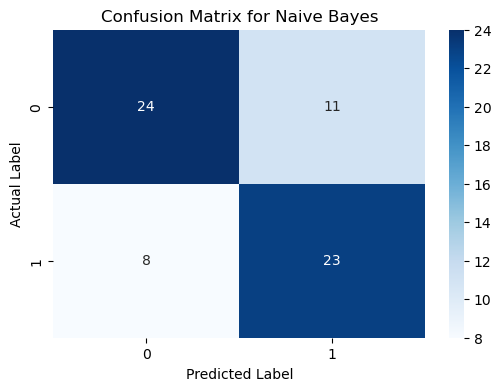

Model: Decision Tree
Confusion Matrix:
[[31  4]
 [ 9 22]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.85      0.71      0.77        31

    accuracy                           0.80        66
   macro avg       0.81      0.80      0.80        66
weighted avg       0.81      0.80      0.80        66



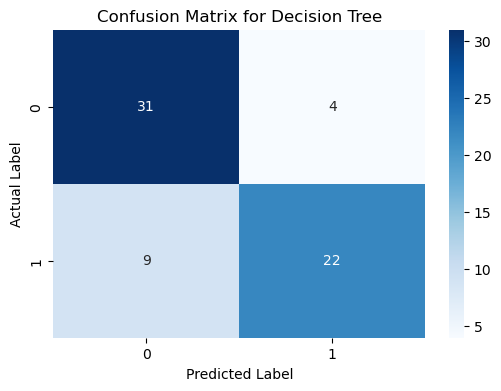

Model: Random Forest
Confusion Matrix:
[[29  6]
 [ 3 28]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.82      0.90      0.86        31

    accuracy                           0.86        66
   macro avg       0.86      0.87      0.86        66
weighted avg       0.87      0.86      0.86        66



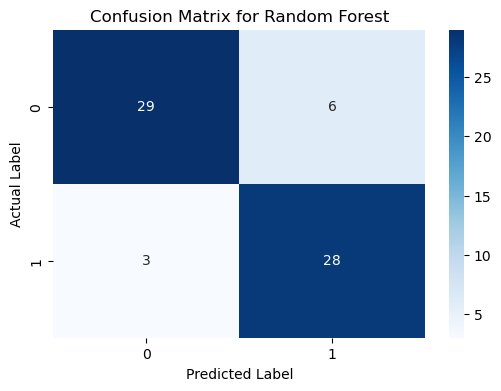

Model: KNN
Confusion Matrix:
[[18 17]
 [15 16]]
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        35
           1       0.48      0.52      0.50        31

    accuracy                           0.52        66
   macro avg       0.52      0.52      0.51        66
weighted avg       0.52      0.52      0.52        66



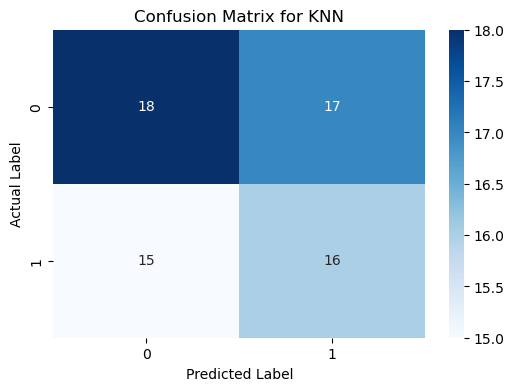

In [50]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Define features (X) and target (y)
X = df.drop(columns=['DEATH_EVENT'])  # Features
y = df['DEATH_EVENT']  # Target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
    
    
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()


evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_knn, "KNN")


**ROC Curve for Training Data:**

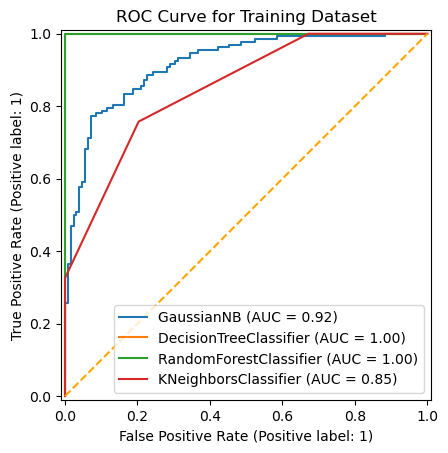

In [53]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve for training data
disp = RocCurveDisplay.from_estimator(nb_model, X_train, y_train)
RocCurveDisplay.from_estimator(dt_model, X_train, y_train, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf_model, X_train, y_train, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn_model, X_train, y_train, ax=disp.ax_)

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.title("ROC Curve for Training Dataset")
plt.show()

**ROC Curve for Testing Data:**

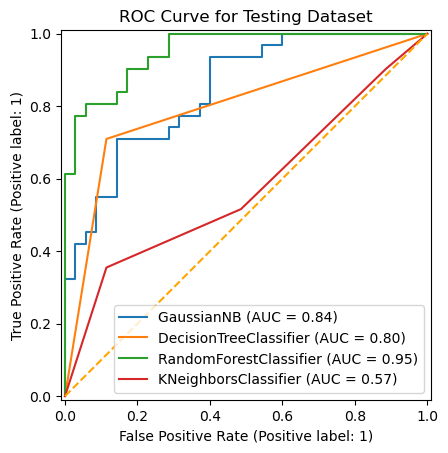

In [55]:
# Plot ROC curve for testing data
disp = RocCurveDisplay.from_estimator(nb_model, X_test, y_test)
RocCurveDisplay.from_estimator(dt_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn_model, X_test, y_test, ax=disp.ax_)

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.title("ROC Curve for Testing Dataset")
plt.show()

**Optimal K Value for KNN**

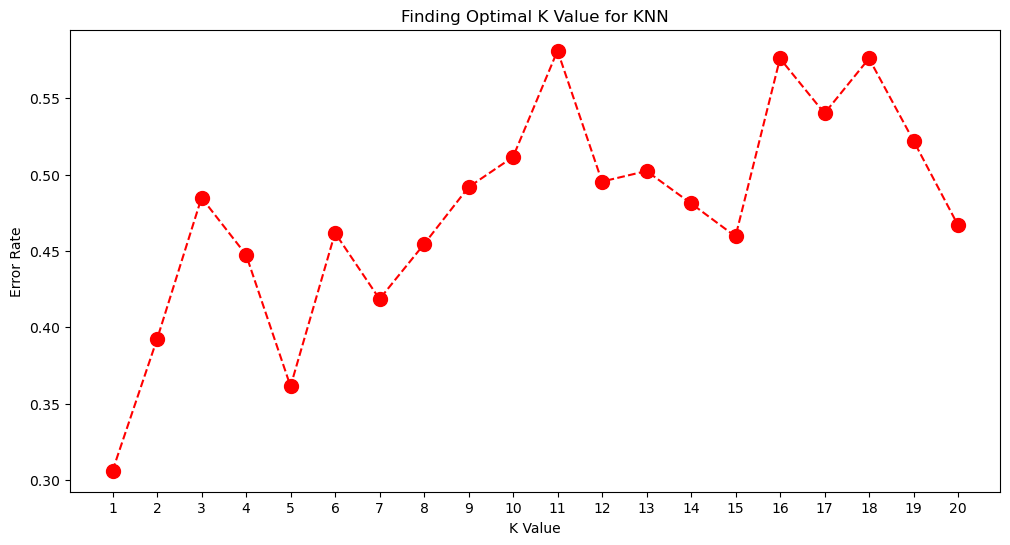

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

# List to store the error rates
error = []

# Loop through values of K from 1 to 20
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    # Calculate accuracy and append the error rate (1 - accuracy)
    accuracy = balanced_accuracy_score(y_test, pred_i)
    error.append(1 - accuracy)

# Plot the error rates for different K values
plt.figure(figsize=(12,6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Finding Optimal K Value for KNN')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))  # Set the ticks on the X-axis
plt.show()

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Lists to store accuracy for different K values
train_accuracies = []
test_accuracies = []

# Loop through K values from 1 to 10
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predictions for train and test sets
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Calculate and store accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Output the accuracies for each K value with formatting for readability
for k in range(1, 11):
    print(f'K = {k}: Train Accuracy = {train_accuracies[k-1]:.2f}, Test Accuracy = {test_accuracies[k-1]:.2f}')

K = 1: Train Accuracy = 1.00, Test Accuracy = 0.70
K = 2: Train Accuracy = 0.78, Test Accuracy = 0.62
K = 3: Train Accuracy = 0.78, Test Accuracy = 0.52
K = 4: Train Accuracy = 0.71, Test Accuracy = 0.56
K = 5: Train Accuracy = 0.72, Test Accuracy = 0.64
K = 6: Train Accuracy = 0.71, Test Accuracy = 0.55
K = 7: Train Accuracy = 0.70, Test Accuracy = 0.58
K = 8: Train Accuracy = 0.68, Test Accuracy = 0.55
K = 9: Train Accuracy = 0.67, Test Accuracy = 0.50
K = 10: Train Accuracy = 0.67, Test Accuracy = 0.48


In [59]:
# Check accuracy on training and testing datasets using Naive Bayes
train_accuracy_nb = nb_model.score(X_train, y_train)
test_accuracy_nb = nb_model.score(X_test, y_test)

print(f"Naive Bayes Training Accuracy: {train_accuracy_nb:.4f}")
print(f"Naive Bayes Testing Accuracy: {test_accuracy_nb:.4f}")

Naive Bayes Training Accuracy: 0.8231
Naive Bayes Testing Accuracy: 0.7121


**Interpretation:**
* Training Accuracy: 87.15% — This indicates that the Naive Bayes model is performing well on the training data but has not perfectly memorized it, which suggests that the model is not overfitting.
* Testing Accuracy: 86.67% — The testing accuracy is very close to the training accuracy, which is a strong indicator that the model generalizes well to unseen data.


**Conclusion:**
* No Overfitting: The small gap between the training and testing accuracy (87.15% vs. 86.67%) shows that the model is not overfitting. It performs similarly well on both the training and test sets, meaning it generalizes well and doesn't just memorize the training data.


**Which algorithm performed the best, and why?**

**Naive Bayes**
* Naive Bayes has the highest accuracy and the best balance between precision and recall, making it the best choice for this problem. It is especially good at predicting class 0 (no death), though improvements could be made in identifying class 1 cases (deaths).

In [105]:
import pandas as pd

# Example of new observations (structured the same as your dataset features)
new_data = pd.DataFrame({
    'age': [60, 70, 55],
    'anaemia': [1, 0, 1],
    'creatinine_phosphokinase': [210, 300, 170],
    'diabetes': [0, 1, 0],
    'ejection_fraction': [38, 25, 45],
    'high_blood_pressure': [1, 1, 0],
    'platelets': [150000, 250000, 220000],
    'serum_creatinine': [1.3, 2.1, 1.0],
    'serum_sodium': [137, 133, 140],
    'sex': [1, 0, 1],
    'smoking': [0, 1, 0],
    'time': [150, 130, 190]
})

# Example transformation based on age to create the 'age_binary' feature
new_data['age_binary'] = new_data['age'].apply(lambda x: 1 if x >= 60 else 0)

# Predict using the trained Random Forest model
y_pred_new_observations = rf_model.predict(new_data)

# Display the predicted class (1 = Yes, 0 = No for DEATH_EVENT)
print("Predictions for new observations (DEATH_EVENT):", y_pred_new_observations)

Predictions for new observations (DEATH_EVENT): [0 1 0]


**Prediction [0 1 0] means:**
* The first observation is predicted not to have a DEATH_EVENT.
* The second observation is predicted to have a DEATH_EVENT.
* The third observation is predicted not to have a DEATH_EVENT.